In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, BSpline

In [77]:
vazao_pa_ba = pd.read_csv('../../datasets/vazao/10-06-2023/tratado/bbr/tratado bbr esmond data pr-am 06-10-2023.csv').copy()
vazao_pa_ba_dados_faltantes = vazao_pa_ba.copy()

In [78]:
# vazao_pa_ba = sample_df = vazao_pa_ba.sample(n=100, random_state=42)

vazao_pa_ba = vazao_pa_ba[vazao_pa_ba['Vazao'] != -1]
#ar = vazao_pa_ba
vazao_pa_ba.head(40)


,Data,Intervalo,Vazao
2,12-12-2022,12:00:00 a 18:00:00,717907237.0
3,12-12-2022,18:00:00 a 23:59:59,918369832.5
5,13-12-2022,06:00:00 a 12:00:00,917452763.0
6,13-12-2022,12:00:00 a 18:00:00,909299198.0
7,13-12-2022,18:00:00 a 23:59:59,910559635.0
9,14-12-2022,06:00:00 a 12:00:00,851234550.0
10,14-12-2022,12:00:00 a 18:00:00,912789287.0
11,14-12-2022,18:00:00 a 23:59:59,918971043.0
12,15-12-2022,00:00:00 a 06:00:00,918975268.0
13,15-12-2022,06:00:00 a 12:00:00,900356981.0


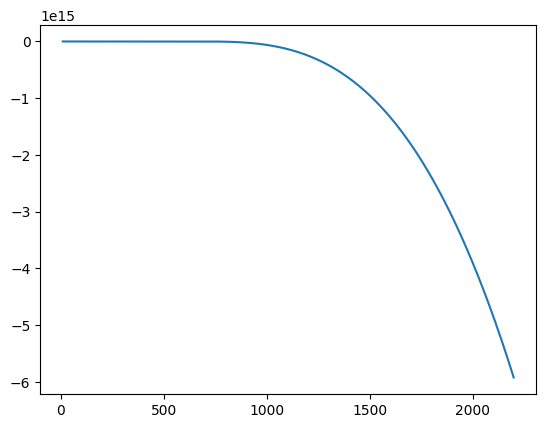

In [79]:
# Define a function for spline interpolation
def interpolate_spline(df):
    x = df.index  
    y = df['Vazao'].values  
    tck = splrep(x, y, s=9090)
    xnew = np.arange(3, 700, 1 / 26) * np.pi
    interpolated_values = BSpline(*tck)(xnew)

    return pd.DataFrame({'Interpolated_Vazao': interpolated_values})

# Example usage:
# Assuming you have a DataFrame named 'your_dataframe'
#vazao_pa_ba['Vazao'] = vazao_pa_ba['Vazao'].replace(-1, np.nan)
interpolated_data = interpolate_spline(vazao_pa_ba)



# # Save the original and interpolated data to CSV files
# vazao_pa_ba.to_csv('original_data.csv', index=False)
# interpolated_data.to_csv('interpolated_data.csv', index=False)

In [80]:
vazao_pa_ba['Sintetico'] = interpolated_data['Interpolated_Vazao']
vazao_pa_ba

TypeError: 'NoneType' object is not subscriptable

<Figure size 2200x900 with 0 Axes>

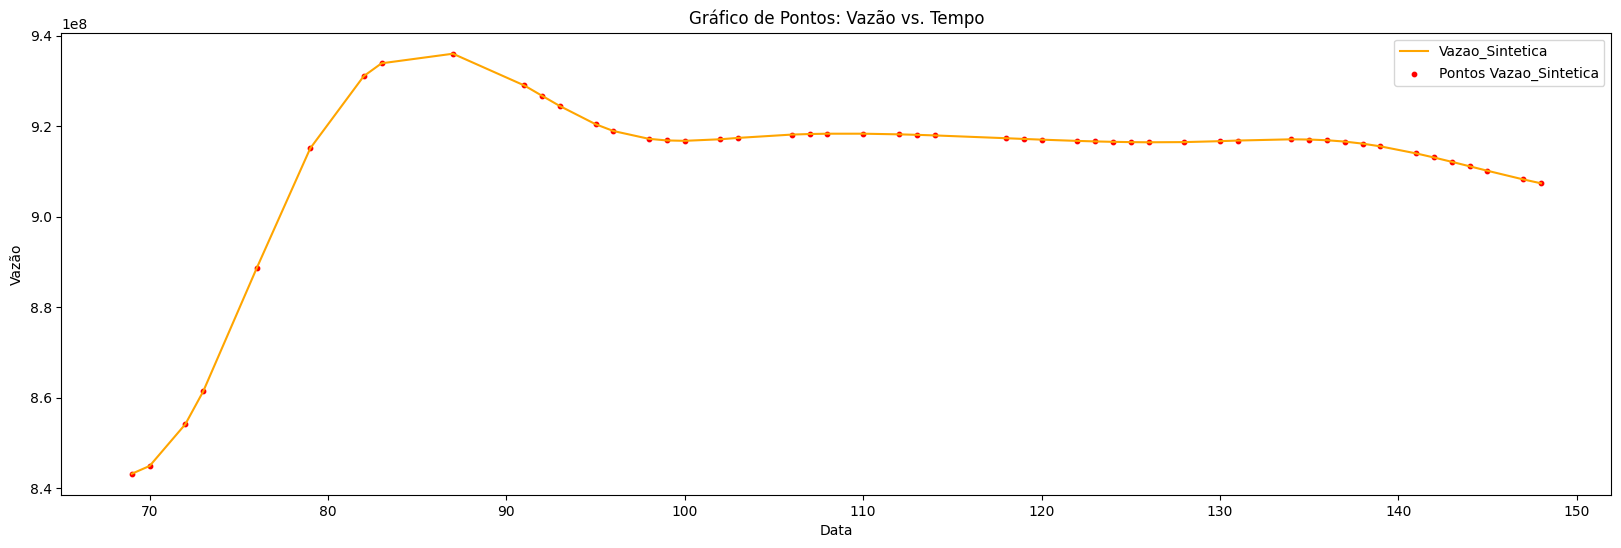

In [ ]:
def plot_vazao_sintetica(df):
    plt.figure(figsize=(20, 6))
    valid_vazao = df['Vazao']
    valid_vazao_sintetica = df['Sintetico'][50:100]
    #plt.ylim(35000000, 10000000)
    
    # Plote a curva laranja que liga os pontos
    plt.plot(valid_vazao_sintetica.index, valid_vazao_sintetica, color='orange', label='Vazao_Sintetica')
    
    # Plote os pontos vermelhos sobre a curva
    plt.scatter(valid_vazao_sintetica.index, valid_vazao_sintetica, color='red', label='Pontos Vazao_Sintetica', s=10)
    
    plt.legend()


def plot_grafico(df):
    plt.figure(figsize=(22, 9))
    plot_vazao_sintetica(df)
    plt.xlabel('Data')
    plt.ylabel('Vazão')
    plt.title('Gráfico de Pontos: Vazão vs. Tempo')
    plt.legend()
    plt.show()

plot_grafico(vazao_pa_ba)